<a href="https://colab.research.google.com/github/Dr-Banana/CSE5544/blob/main/Zhang_10419_lab2_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import random
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import repeat

# Import the library, authenticate, and create the interface to Sheets.
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
# access the google sheet and load it into pandas dataframe
#################### Do this only at the first time
wkbook = 'https://docs.google.com/spreadsheets/d/1HiVAuTr1miXHKCmxRDu_ZspUXttlRINN3ec2CvFHg1k/edit?usp=sharing'

wb = gc.open_by_url(wkbook)
sheet = wb.worksheet('Sheet1')
sheet_data = sheet.get_all_values()

df_data = pd.DataFrame(sheet_data)
# make row 0 into the column headers, then drop it
df_data.columns = df_data.iloc[0]
df_data.drop(df_data.index[0], inplace=True)

In [ ]:
df_data = df_data.replace('..',0)
for i in range(30):
  year = str(1990+i)
  df_data[year] = df_data[year].astype(float)
df_data_noTotal = df_data.set_index("Country\year")
df_data_noTotal = df_data_noTotal.drop("OECD - Total")

#Plot 1: number of data collect by each country
From the plot shown below we can see that there is no significant 
correlation between the number of data collect and the country. 

The error may occurs on the number of data for China. This 
may be because of various reasons. 

Since this plot is number of record VS. country, it is not year 
correlated.

According to this figure, Iran, South Africa, India, Saudi Arabia, 
Peru, and China are the outliers.

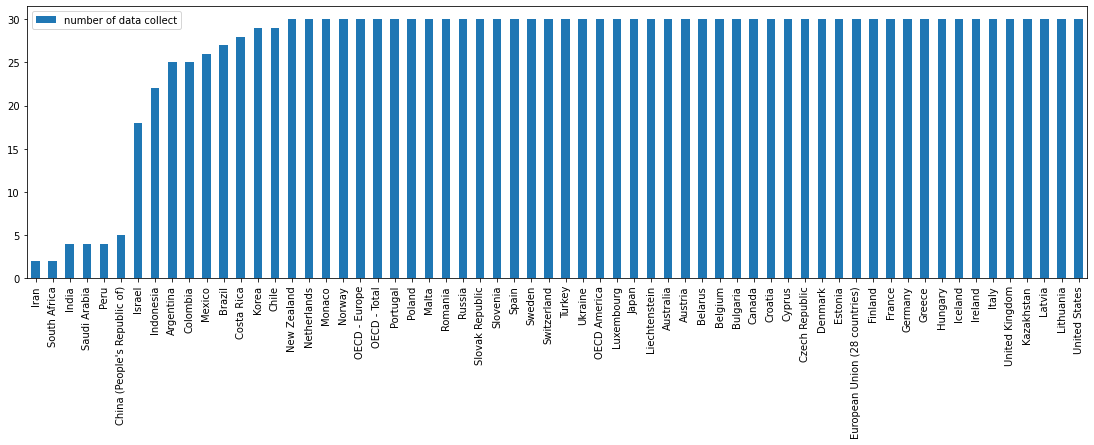

In [ ]:
country_list = df_data['Country\year'].tolist()
count_arr = []
for n in range(len(country_list)):
  count = 0
  for i in range(30):
    year = str(1990+i)
    tmp = df_data.iloc[n][year]
    if(tmp!=0):
      count += 1
  count_arr.append(count)
c_data = pd.DataFrame({'country':country_list,"number of data collect":count_arr},index=country_list)
c_data.sort_values(by='number of data collect', inplace = True)
c_data.plot(kind="bar",figsize=(19, 5))

#Plot 2: Number of data collected over the year
From the plot shown below we can see that the number of emission data 
collect around the world is decreasing after 2012.

There are no significant errors in this plot. The decrease of the
number data can be treated as a trend.

Since this plot is number of record VS. years, it is year 
correlated.

There are no outliers in this plot.

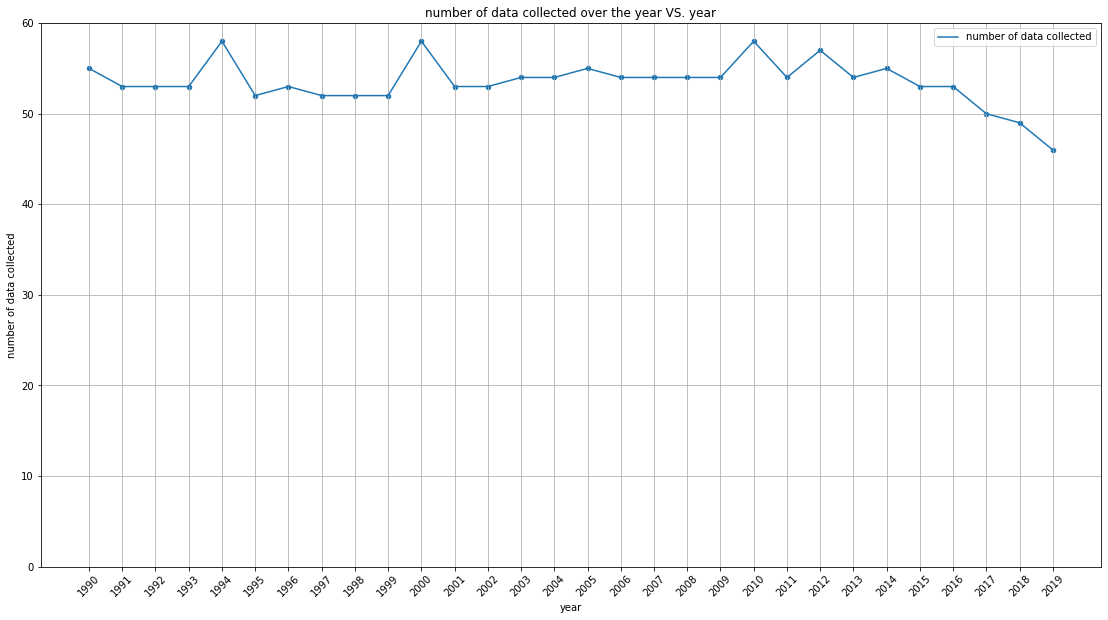

In [ ]:
country_list = df_data_noTotal.index.tolist()
df = df_data_noTotal.drop(columns='Non-OECD Economies')
count_arr = []
year_arr = []

for i in range(30):
  count = 0
  year = str(1990+i)
  year_arr.append(year)
  for j in range(1,61):
    if(df[year][j]!=0):
      count += 1
  count_arr.append(count)

fig, ax = plt.subplots()
chart_data = {"number of data collected":count_arr,"year":year_arr}
chart_data = pd.DataFrame(data=chart_data,index=year_arr)
chart_data.plot(kind = 'line',ax=ax)
chart_data.plot(kind = 'scatter',x="year",y="number of data collected",ax=ax,figsize=(19, 10))
plt.title("number of data collected over the year VS. year")
ax.set_xticks(year_arr)
ax.set_xticklabels(year_arr, rotation=45)
plt.ylim([0, 60])
plt.grid()


In [ ]:
# Set a new df_1 without OECD-Total and Non-OCED Economies column
df_1 = df_data.drop(df_data[df_data['Country\\year']=="OECD - Total"].index)
df_1.reset_index(inplace=True)
df_1 = df_1.drop(columns=['Non-OECD Economies','index'])
# add corresponding continent
df_1["Continent"] = ["South America","Oceania","Europe","Europe","Europe","South America","Europe","North America","South America","Asia","South America","North America","Europe","Asia","Europe","Europe","Europe","","Europe","Europe","Europe","Europe","Europe","Europe","Asia","Asia","Asia","Europe","Asia","Europe","Asia","Asia","Asia","Europe","Europe","Europe","Europe","Europe","North America","Europe","Europe","Oceania","Europe","","","South America","Europe","Europe","Europe","Europe","Asia","Europe","Europe","Africa","Europe","Europe","Europe","Asia","Europe","Europe","North America"]

#Plot 3: Emission for each continent from 1990 to 2019
From the plot shown below we can see that the emission almost remain same
on every continent except South America, which decrease the emission after
2014..

There are no significant errors in this plot. The fluctuation on the 
Asia's graph may be caused by the lack of China's data.

Since this plot is emission VS. years, it is year correlated.

There are no outliers in this plot.

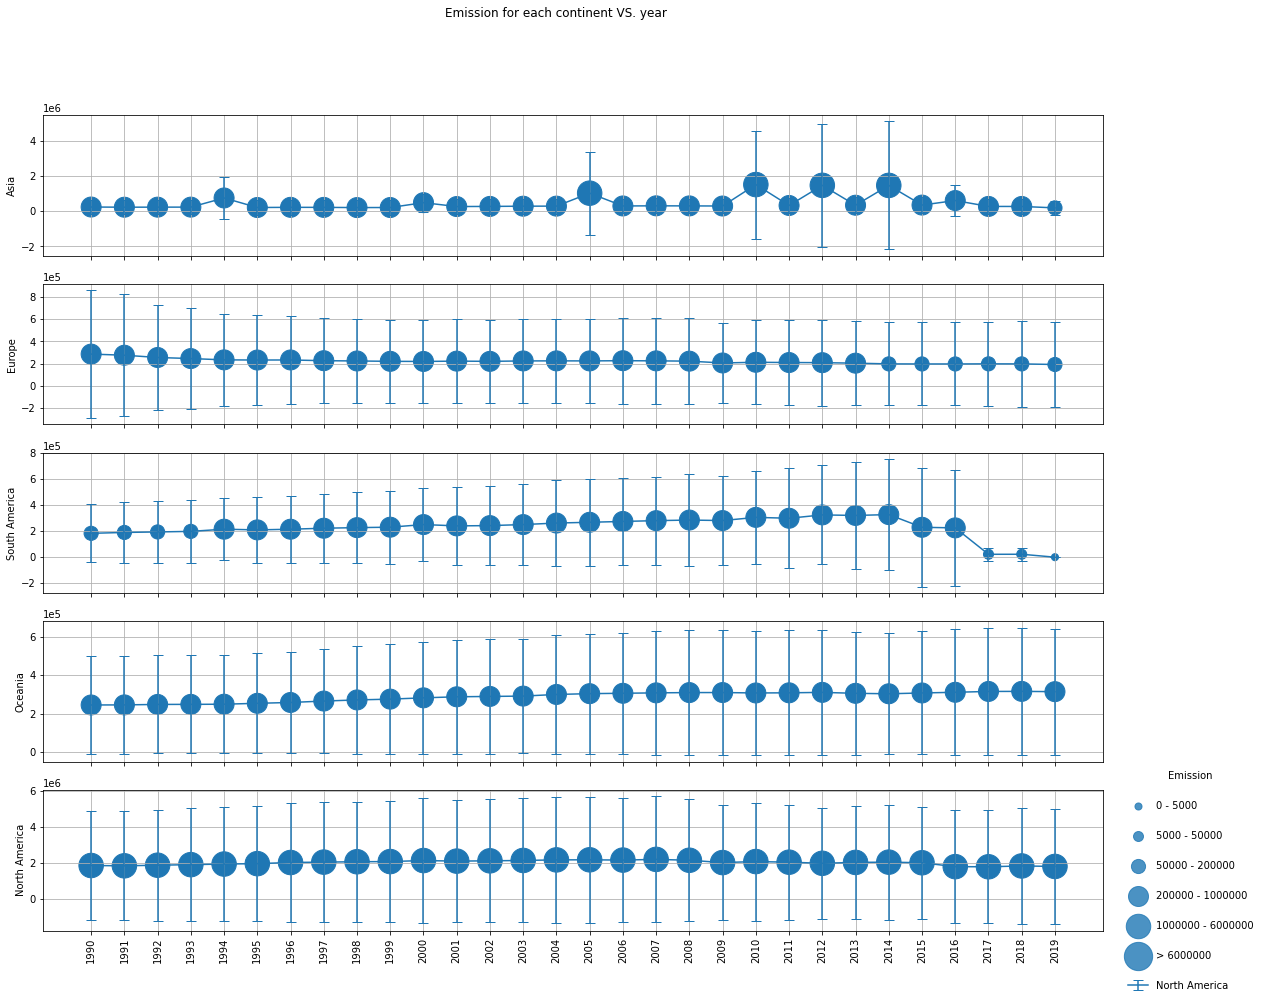

In [ ]:
# add corresponding continent
df_1["Continent"] = ["South America","Oceania","Europe","Europe","Europe","South America","Europe","North America","South America","Asia","South America","North America","Europe","Asia","Europe","Europe","Europe","","Europe","Europe","Europe","Europe","Europe","Europe","Asia","Asia","Asia","Europe","Asia","Europe","Asia","Asia","Asia","Europe","Europe","Europe","Europe","Europe","North America","Europe","Europe","Oceania","Europe","","","South America","Europe","Europe","Europe","Europe","Asia","Europe","Europe","Africa","Europe","Europe","Europe","Asia","Europe","Europe","North America"]

fig, ax = plt.subplots(5)
fig.suptitle('Emission for each continent VS. year')
continent_list = ['Asia','Europe','South America','Oceania','North America']
for n in range(5):
  mean_list = []
  total_list = []
  std_list = []
  year_list = []
  chart_data = pd.DataFrame()
  df_tmp = df_1[df_1["Continent"]== continent_list[n]]
  rgb = (random.random(), random.random(), random.random())
  for i in range(30):
    year = str(1990+i)
    year_list.append(year)
    total = df_tmp[year].sum()
    total_list.append(total)
    mean = df_tmp[year].mean()
    mean_list.append(mean)
    std = df_tmp[year].std()
    std_list.append(std)
  sizeList = []
  for i in mean_list:
      if i<5000:
        sizeList.append(50)
      elif i<50000 and i>5000:
        sizeList.append(100)
      elif i<200000 and i>50000:
        sizeList.append(200)
      elif i<1000000 and i>200000:
        sizeList.append(400)
      elif i<6000000 and i>1000000:
        sizeList.append(600)
      else:
        sizeList.append(800)
  chart_data = {'year':year_list,continent_list[n]:mean_list}
  chart_data = pd.DataFrame(data=chart_data,index=year_list)
  plot = chart_data.plot(kind="line",figsize=(19, 15),yerr=std_list,capsize=5,ax=ax[n],legend=None)
  plot = chart_data.plot(kind='scatter',x="year",y=continent_list[n],ax=ax[n],s=sizeList,alpha=1,legend=None)
  plot.set(xlabel=None)
  plot.set_xticks(year_list)
  plot.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
  plot.set_xticklabels(year_list, rotation=90)
  plot.grid()
  if n!=4:
    plot.tick_params(labelbottom=False, right=False )
intervals = ['0 - 5000', '5000 - 50000', '50000 - 200000', '200000 - 1000000', '1000000 - 6000000', '> 6000000']
size = [50, 100, 200, 400, 600, 800]
for k in range(6):
    plt.scatter([], [], c='#1f77b4', alpha=0.8, s=size[k],label=str(intervals[k]))
plt.legend(scatterpoints=1, frameon=False, labelspacing=2, title='Emission',bbox_to_anchor=(1.15, 1.2))
plt.show()


In [ ]:
# Set a new df_2 without OECD-Total row
df_2 = df_data.drop(df_data[df_data['Country\\year']=="OECD - Total"].index)
df_2.reset_index(inplace=True)
df_2 = df_2.drop(columns=['index'])

#Plot 4: Emission for OECD Economies country and Non-OECD Economies country
From the plot shown below we can see that OECD Economies countries 
have a higher mean value but smaller STD.

There are no significant errors in this plot. Outliers may be the error of this set of data.

Since this plot is Emission for OECD Economies country and Non-OECD Economies country, it is not year correlated.

There are few outliers in both plots, OCED countries have more outliers.

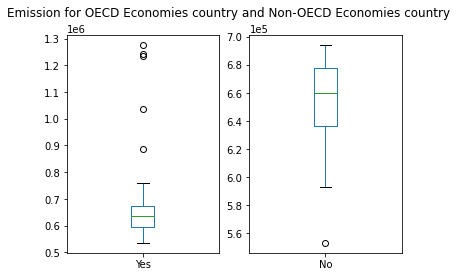

In [ ]:
fig, ax = plt.subplots(1,2)
OCED_list = ['Yes','No']
for n in range(len(OCED_list)):
  mean_list = []
  year_list = []
  chart_data = pd.DataFrame()
  df_tmp = df_2[df_2["Non-OECD Economies"]== OCED_list[n]]
  for i in range(30):
    year = str(1990+i)
    year_list.append(year)
    mean = df_tmp[year].mean()
    mean_list.append(mean)
  chart_data = {'year':year_list,OCED_list[n]:mean_list}
  chart_data = pd.DataFrame(data=chart_data,index=year_list)
  plot = chart_data.boxplot(OCED_list[n],ax=ax[n])
  plot.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
  plot.grid()
fig.suptitle('Emission for OECD Economies country and Non-OECD Economies country')
plt.show()

#Plot 5: Emission for all OECD countries, OECD Europe countries and OECD America
From the plot shown below we can see that OECD America mean is higher than OECD Europe but they have similar standard deviation.

There are no significant errors in this plot. 


Since this plot is Emission for all OECD countries, OECD Europe countries and OECD America country, it is not year correlated.

There are no outliers in all three plots.

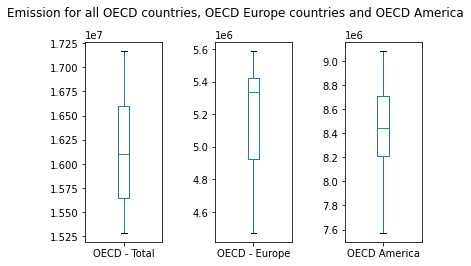

In [ ]:
fig, ax = plt.subplots(1,3)
OCED_3country_list = ['OECD - Total','OECD - Europe','OECD America']
for n in range(len(OCED_3country_list)):
  mean_list = []
  total_list = []
  year_list = []
  chart_data = pd.DataFrame()
  df_tmp = df_data[df_data["Country\year"]== OCED_3country_list[n]]
  for i in range(30):
    year = str(1990+i)
    year_list.append(year)
    total = df_tmp[year].sum()
    total_list.append(total)
    mean = df_tmp[year].mean()
    mean_list.append(mean)
  chart_data = {'year':year_list,OCED_3country_list[n]:mean_list}
  chart_data = pd.DataFrame(data=chart_data,index=year_list)
  plot = chart_data.boxplot(OCED_3country_list[n],ax=ax[n])
  plot.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
  plot.grid()
fig.suptitle('Emission for all OECD countries, OECD Europe countries and OECD America')
fig.tight_layout(pad=3.0)
plt.show()

#Plot 6: Pie chart for the top 10 emission country
From the plot shown below we can see that OECD America have the highest emission around the world. Among the top 10 emission countries, United States and OECD America coverd almost 50% of the emission.

There are no significant errors in this plot.

It is not correlate to years.

There are no outliers in all three plots.

Text(0, 0.5, '')

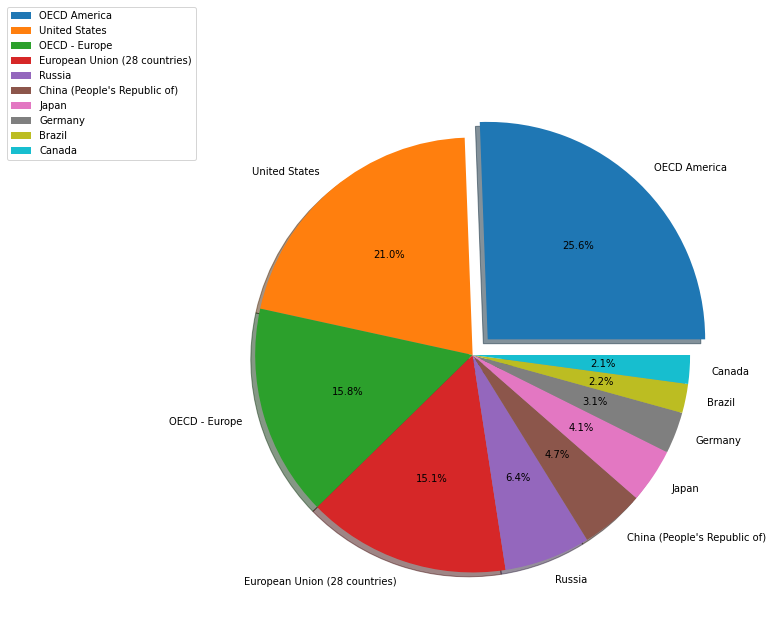

In [ ]:
country_list = df_data['Country\year'].tolist()
chart_data = pd.DataFrame()
df_3 = df_2.set_index('Country\year')
df_3 = df_3.drop(columns=['Non-OECD Economies'])
df_3['sum']=df_3.sum(axis=1)
df_3.sort_values(by='sum', inplace = True,ascending = False)
df_head = df_3.head(10)
explode = (0.1,0,0,0,0,0,0,0,0,0) 
plot = df_head.plot.pie(y='sum',explode=explode, figsize=(10, 10),autopct='%1.1f%%',shadow=True)
plot.legend(bbox_to_anchor=(0, 1.15))
plot.set_ylabel('')

#Plot 7: Pie chart for the bottom 10 emission country
From the plot shown below we can see that Monaco have the lowest emsission. Except for Slovenia, Monaco, Liechtenstein, other countries have approximatly similar percentage of emission.

Emission of Monaco is extremely low which seems to have a data collection error.

It is not year correlated.

Monaco and Liechtenstein seems to be two outliers.

Text(0, 0.5, '')

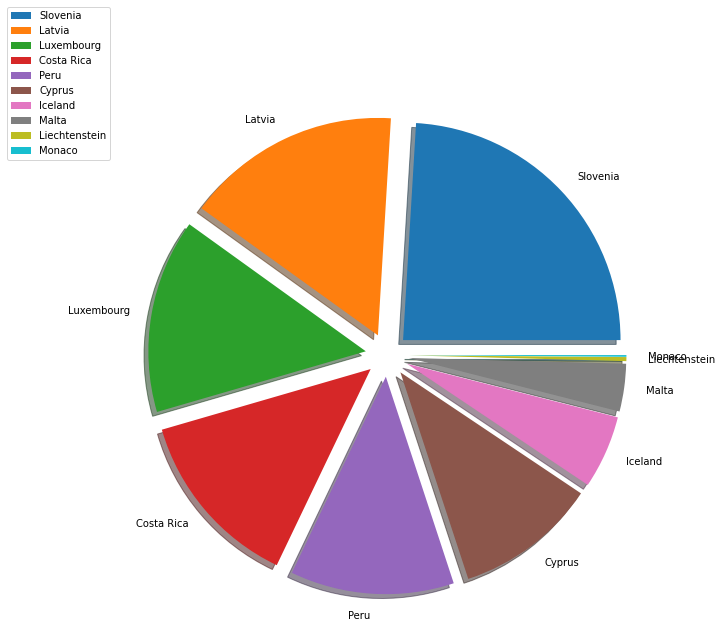

In [ ]:
df_tail = df_3.tail(10)
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1) 
plot = df_tail.plot.pie(y='sum',explode=explode, figsize=(10, 10),shadow=True)
plot.legend(bbox_to_anchor=(0, 1.15))
plot.set_ylabel('')

#Plot 8: Emission for United States and Monaco
From the plot shown below we can see that Monaco have thousand times less emission than United stataes.Since the comparison is between the highest emission and lowest emission, the large difference is reasonable.

There are no significant errors in this plot.

It is not year correlated.

There are no outliers in both baxplots.


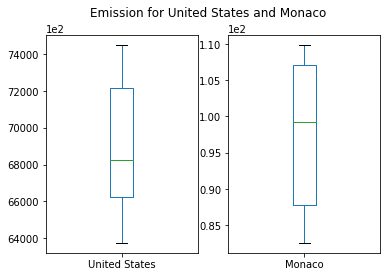

In [ ]:
fig, ax = plt.subplots(1,2)

chart_data = pd.DataFrame()
fig.suptitle('Emission for United States and Monaco')
country_list = ['United States','Monaco']
for n in range(2):
  mean_list = []
  chart_data = pd.DataFrame()
  df_tmp = df_1[df_1["Country\year"]== country_list[n]]
  for i in range(30):
    year = str(1990+i)
    mean = df_tmp[year].mean()
    mean_list.append(mean)
  chart_data = {country_list[n]:mean_list}
  chart_data = pd.DataFrame(data=chart_data,index=year_list)
  plot = chart_data.boxplot(country_list[n],ax=ax[n])
  plot.ticklabel_format(axis="y", style="sci", scilimits=(2,2))
  plot.grid()
plt.show()

#Plot 9: The mean and standard deviation of emissions over years
From the plot shown below we can see that the emissions since 1990 seems stay around 1000000, year 2010,2012,2014 have the highest emissions.

There are no significant errors in this plot.

Since the graph is about the emissions over the years, it is year correlated.

There are no outliers in this plot.

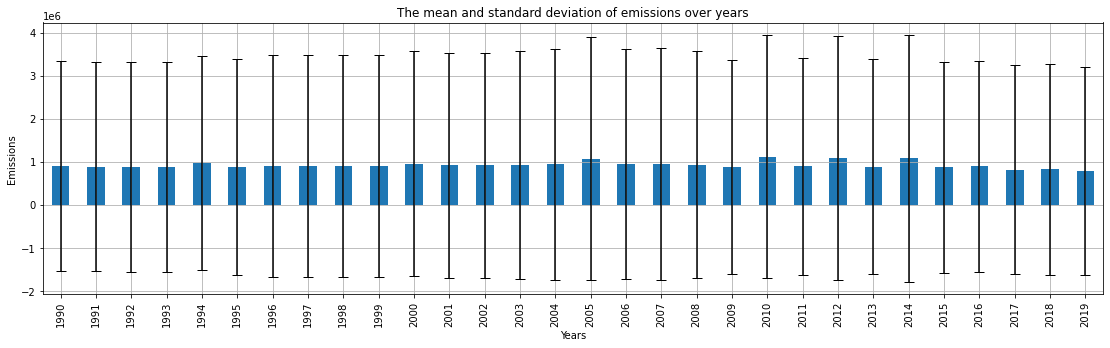

In [ ]:
year_list = []
mean_list = []
total_list = []
std_list = []
for i in range(30):
  year = str(1990+i)
  year_list.append(year)
  total = df_data.replace('..',0)[year].astype('float').sum()
  total_list.append(total)
  mean = df_data.replace('..',0)[year].astype('float').mean()
  mean_list.append(mean)
  std = df_data.replace('..',0)[year].astype('float').std()
  std_list.append(std)
chart_data = {'year':year_list,'mean':mean_list}
chart_data = pd.DataFrame(data=chart_data,index=year_list)
chart_data.plot(kind="bar",figsize=(19, 5),yerr=std_list,capsize=5,legend=None)
plt.title('The mean and standard deviation of emissions over years')
plt.xlabel("Years")
plt.ylabel("Emissions")
plt.grid()

#Plot 10: Emission for each country/year
From the plot shown below it is hard to find the correlation between countries over the years.

From the plot we can see that the emission dramatically droped between 1995 and 1999, and so do happend for different countries in different years. There might be some errors in data collection in different countries during different years.

Since the graph is about the emissions for different country over the years, it is year correlated.

It is hard to tell the outliers from this graph

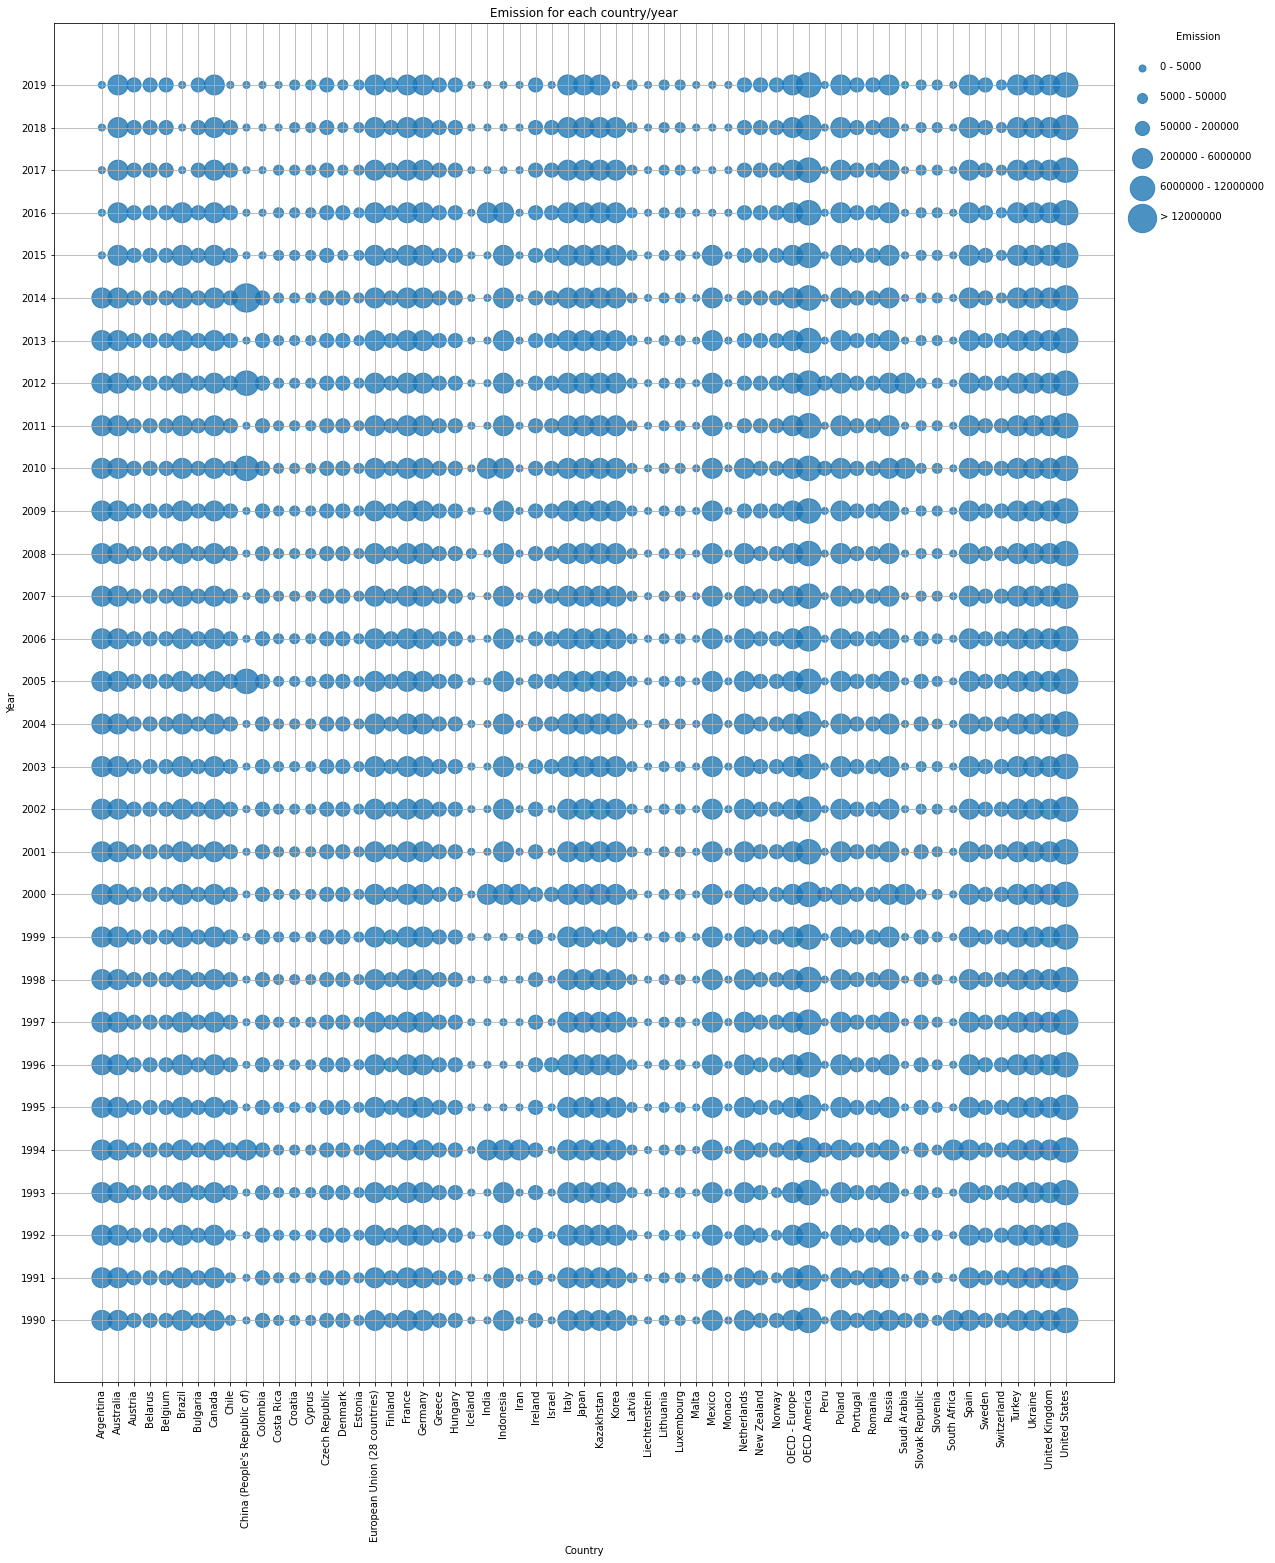

In [ ]:
df_data_noTotal = df_data.drop(df_data[df_data['Country\\year']=="OECD - Total"].index)
fig, ax = plt.subplots()
country_list = df_data_noTotal['Country\\year'].tolist()
df = df_data_noTotal.drop(columns=['Non-OECD Economies'])

for col in df.drop(columns='Country\\year').columns:
    df['y'] = col
    country_em_list = df[col].tolist()
    sizeList = []
    for i in country_em_list:
      if i<5000:
        sizeList.append(50)
      elif i<50000 and i>5000:
        sizeList.append(100)
      elif i<200000 and i>50000:
        sizeList.append(200)
      elif i<6000000 and i>200000:
        sizeList.append(400)
      elif i<12000000 and i>6000000:
        sizeList.append(600)
      else:
        sizeList.append(800)
    pc = df.plot(kind = 'scatter',x = 'Country\\year', y='y',s=sizeList,ax=ax,figsize=(19, 25),alpha=0.8)
    df = df.drop(columns = 'y')
intervals = ['0 - 5000', '5000 - 50000', '50000 - 200000', '200000 - 6000000', '6000000 - 12000000', '> 12000000']
size = [50, 100, 200, 400, 600, 800]
for k in range(6):
    plt.scatter([], [], c='#1f77b4', alpha=0.8, s=size[k],label=str(intervals[k]))
plt.legend(scatterpoints=1, frameon=False, labelspacing=2, title='Emission',bbox_to_anchor=(1.15, 1))
plt.xticks(rotation = 90)
plt.ylabel('Year')
plt.xlabel('Country')
plt.title('Emission for each country/year')
plt.grid()
plt.show()